In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import re
import ast

In [3]:
#Reading csv data
datag_cleaned= pd.read_csv("games_cleaned.csv")
datavg_cleaned=pd.read_csv("Videogames_cleaned.csv")

In [4]:
datag_cleaned

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,Team,Genres,Summary,Reviews
0,0,4.5,3900.0,3900.0,17000.0,3800.0,4600.0,4800.0,2022,elden ring,"bandai namco entertainment, fromsoftware","['Adventure', 'RPG']","elden ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...
1,1,4.3,2900.0,2900.0,21000.0,3200.0,6300.0,3600.0,2019,hades,supergiant games,"['Adventure', 'Brawler', 'Indie', 'RPG']",a roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...
2,2,4.4,4300.0,4300.0,30000.0,2500.0,5000.0,2600.0,2017,the legend of zelda breath of the wild,"nintendo, nintendo epd production group no 3","['Adventure', 'RPG']",the legend of zelda breath of the wild is the ...,this game is the game that is not csgo that i ...
3,3,4.2,3500.0,3500.0,28000.0,679.0,4900.0,1800.0,2015,undertale,"tobyfox, 84","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","a small child falls into the underground, wher...",soundtrack is tied for 1 with nier automata a...
4,4,4.4,3000.0,3000.0,21000.0,2400.0,8300.0,2300.0,2017,hollow knight,team cherry,"['Adventure', 'Indie', 'Platform']",a 2d metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,3.2,94.0,94.0,763.0,5.0,223.0,67.0,2010,back to the future the game,telltale games,"['Adventure', 'Point-and-Click']",back to the future the game is one of telltale...,very enjoyable game the story adds onto the mo...
1508,1508,2.9,264.0,264.0,1500.0,49.0,413.0,107.0,2019,team sonic racing,"sumo digital, sega","['Arcade', 'Racing']",team sonic racing combines the best elements o...,"jogo morto mas bom, not my cup of tea, compare..."
1509,1509,3.7,210.0,210.0,1100.0,45.0,487.0,206.0,2012,dragons dogma,capcom,"['Brawler', 'RPG']","set in a huge open world, dragons dogma dark a...","underrated, a grandes rasgos, es como un mmo p..."
1510,1510,4.1,165.0,165.0,269.0,79.0,388.0,602.0,2020,baldurs gate 3,larian studios,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","an ancient evil has returned to baldurs gate, ...","bu tre bu oyunla girmeye almak hatayd sanrm, e..."


In [5]:
datag_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Rating             1512 non-null   float64
 2   Times Listed       1512 non-null   float64
 3   Number of Reviews  1512 non-null   float64
 4   Plays              1512 non-null   float64
 5   Playing            1512 non-null   float64
 6   Backlogs           1512 non-null   float64
 7   Wishlist           1512 non-null   float64
 8   Year               1512 non-null   int64  
 9   Title              1512 non-null   object 
 10  Team               1512 non-null   object 
 11  Genres             1512 non-null   object 
 12  Summary            1512 non-null   object 
 13  Reviews            1500 non-null   object 
dtypes: float64(7), int64(2), object(5)
memory usage: 165.5+ KB


In [6]:
datavg_cleaned

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01,woodywoodpeckerincrazycastle5,gba,platform,kemco
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01,meninblackiialienescape,gc,shooter,infogrames
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01,scoreinternationalbaja1000theofficialgame,ps2,racing,activision
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01,knowhow2,ds,puzzle,7games


In [7]:
datavg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Year          16598 non-null  float64
 2   NA_Sales      16598 non-null  float64
 3   EU_Sales      16598 non-null  float64
 4   JP_Sales      16598 non-null  float64
 5   Other_Sales   16598 non-null  float64
 6   Global_Sales  16598 non-null  float64
 7   Name          16598 non-null  object 
 8   Platform      16598 non-null  object 
 9   Genre         16598 non-null  object 
 10  Publisher     16598 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
datavg_cleaned.drop(columns=['Year', 'Genre'], inplace=True, errors='ignore')
datavg_cleaned.rename(columns={'Name': 'Title'}, inplace=True)


In [9]:
datavg_cleaned

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Title,Platform,Publisher
0,1,41.49,29.02,3.77,8.46,82.74,wiisports,wii,nintendo
1,2,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,nintendo
2,3,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,nintendo
3,4,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,nintendo
4,5,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,nintendo
...,...,...,...,...,...,...,...,...,...
16593,16596,0.01,0.00,0.00,0.00,0.01,woodywoodpeckerincrazycastle5,gba,kemco
16594,16597,0.01,0.00,0.00,0.00,0.01,meninblackiialienescape,gc,infogrames
16595,16598,0.00,0.00,0.00,0.00,0.01,scoreinternationalbaja1000theofficialgame,ps2,activision
16596,16599,0.00,0.01,0.00,0.00,0.01,knowhow2,ds,7games


In [10]:
final_Vgmerged= pd.merge(datag_cleaned,datavg_cleaned, how="inner", on="Title")

In [12]:
final_Vgmerged

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,...,Summary,Reviews,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Publisher
0,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,73,5.58,2.83,0.02,0.77,9.20,x360,microsoftgamestudios
1,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,169,1.97,2.51,0.00,0.94,5.42,ps3,sonycomputerentertainment
2,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,298,1.38,1.87,0.12,0.65,4.02,ps4,sonycomputerentertainmenteurope
3,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,644,1.43,0.76,0.00,0.22,2.41,xone,microsoftgamestudios
4,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,715,0.28,0.79,0.87,0.32,2.25,psv,sonycomputerentertainmenteurope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1420,3.4,233.0,233.0,2100.0,19.0,359.0,196.0,2006,black,...,black takes place in chechnya southern russia ...,"rating 7510 pretty good, always thought this ...",4654,0.31,0.09,0.00,0.01,0.42,xb,electronicarts
143,1455,3.3,131.0,131.0,1400.0,5.0,276.0,152.0,2005,gun,...,gun is a realistic epic actionadventure that l...,"depois de vrios anos, rejoguei o to amado gun ...",1723,0.98,0.04,0.00,0.16,1.17,ps2,activision
144,1455,3.3,131.0,131.0,1400.0,5.0,276.0,152.0,2005,gun,...,gun is a realistic epic actionadventure that l...,"depois de vrios anos, rejoguei o to amado gun ...",3861,0.38,0.12,0.00,0.02,0.52,xb,activision
145,1455,3.3,131.0,131.0,1400.0,5.0,276.0,152.0,2005,gun,...,gun is a realistic epic actionadventure that l...,"depois de vrios anos, rejoguei o to amado gun ...",6316,0.24,0.01,0.00,0.02,0.27,x360,activision


In [13]:
final_Vgmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         147 non-null    int64  
 1   Rating             147 non-null    float64
 2   Times Listed       147 non-null    float64
 3   Number of Reviews  147 non-null    float64
 4   Plays              147 non-null    float64
 5   Playing            147 non-null    float64
 6   Backlogs           147 non-null    float64
 7   Wishlist           147 non-null    float64
 8   Year               147 non-null    int64  
 9   Title              147 non-null    object 
 10  Team               147 non-null    object 
 11  Genres             147 non-null    object 
 12  Summary            147 non-null    object 
 13  Reviews            147 non-null    object 
 14  Rank               147 non-null    int64  
 15  NA_Sales           147 non-null    float64
 16  EU_Sales           147 non

In [14]:
final_Vgmerged.duplicated().sum()

np.int64(0)

In [15]:
final_Vgmerged.isna().sum()

Unnamed: 0           0
Rating               0
Times Listed         0
Number of Reviews    0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Year                 0
Title                0
Team                 0
Genres               0
Summary              0
Reviews              0
Rank                 0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Platform             0
Publisher            0
dtype: int64

In [34]:
def safe_literal_eval(x):
  if pd.notna(x) and isinstance(x, str) and x.startswith("["):
      try:
       return ast.literal_eval(x)
      except (ValueError, SyntaxError):
          return np.nan
  return x

final_Vgmerged["Genres"] = final_Vgmerged["Genres"].apply(safe_literal_eval)

In [35]:
final_Vgmerged["Genres"]

0      [Adventure, Simulator]
1      [Adventure, Simulator]
2      [Adventure, Simulator]
3      [Adventure, Simulator]
4      [Adventure, Simulator]
                ...          
142                 [Shooter]
143               [Adventure]
144               [Adventure]
145               [Adventure]
146               [Adventure]
Name: Genres, Length: 147, dtype: object

Genres
Turn Based Strategy      0.81
Strategy                 6.82
Simulator               98.20
Shooter                 48.58
Real Time Strategy       1.17
RPG                     42.56
Puzzle                 115.22
Point-and-Click          0.11
Platform                29.71
Indie                    1.91
Name: Global_Sales, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15712\1262272771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_globalsales.index, y=genre_globalsales.values,palette='viridis')


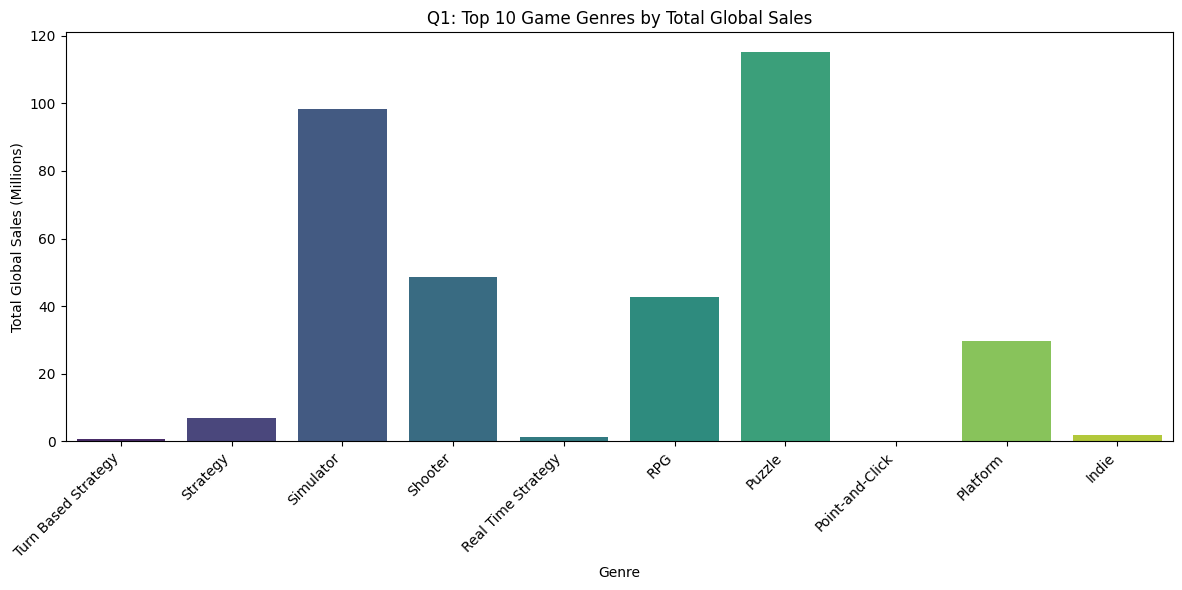

In [36]:
#1. Which game genres generate the most global sales?
genre_exploded= final_Vgmerged.explode("Genres")
genre_globalsales= genre_exploded.groupby(["Genres"])["Global_Sales"].sum().sort_index(ascending=False).head(10)
print(genre_globalsales)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_globalsales.index, y=genre_globalsales.values,palette='viridis')
plt.title('Q1: Top 10 Game Genres by Total Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
final_Vgmerged.head()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,...,Summary,Reviews,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Publisher
0,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,73,5.58,2.83,0.02,0.77,9.20,x360,microsoftgamestudios
1,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,169,1.97,2.51,0.00,0.94,5.42,ps3,sonycomputerentertainment
2,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,298,1.38,1.87,0.12,0.65,4.02,ps4,sonycomputerentertainmenteurope
3,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,644,1.43,0.76,0.00,0.22,2.41,xone,microsoftgamestudios
4,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,715,0.28,0.79,0.87,0.32,2.25,psv,sonycomputerentertainmenteurope


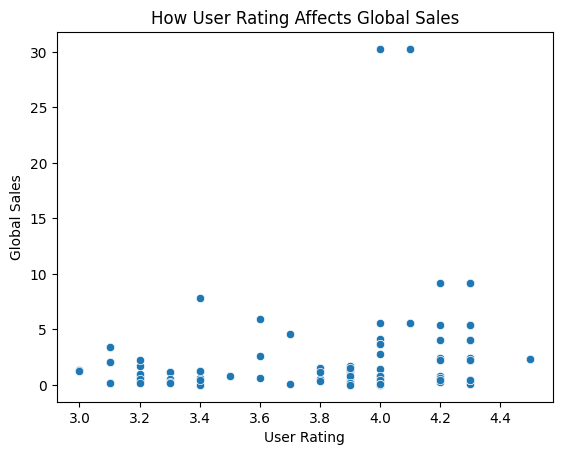

In [38]:
#2.🎯 How does user rating affect global sales?
sns.scatterplot(x="Rating", y="Global_Sales", data=final_Vgmerged)
plt.title("How User Rating Affects Global Sales")
plt.xlabel("User Rating")
plt.ylabel("Global Sales")
plt.show()

Platform
x360    9
pc      9
ps3     8
ps4     8
ps      6
gba     6
xone    5
psv     5
wiiu    5
ps2     5
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15712\36090206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette="viridis")


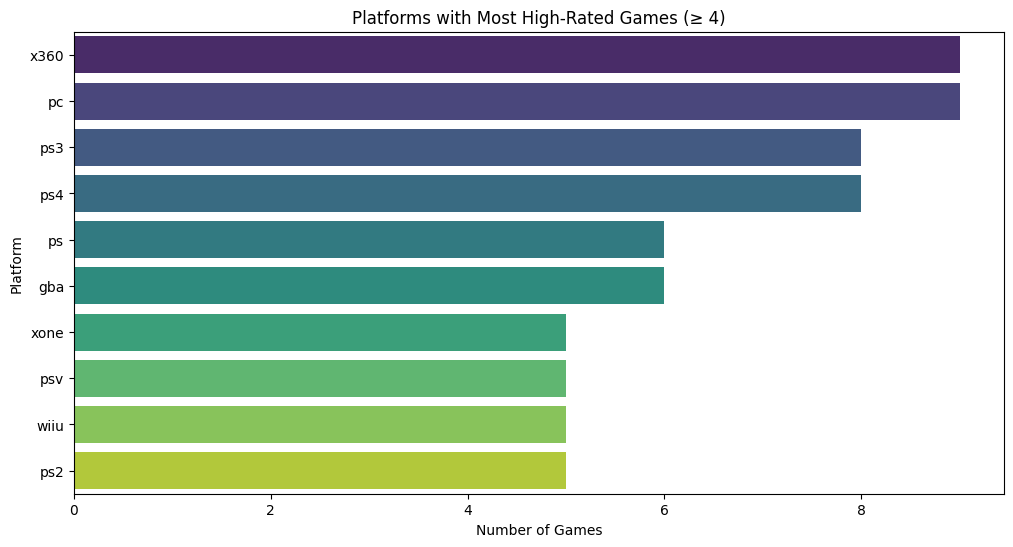

In [39]:
#3.🕹️ Which platforms have the most games with high ratings (e.g., above 4)?
high_rated = final_Vgmerged[final_Vgmerged["Rating"] >= 4]
platform_counts = high_rated["Platform"].value_counts().head(10)
print(platform_counts)
plt.figure(figsize=(12,6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette="viridis")
plt.title("Platforms with Most High-Rated Games (≥ 4)")
plt.xlabel("Number of Games")
plt.ylabel("Platform")
plt.show()

In [40]:
final_Vgmerged.head()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,...,Summary,Reviews,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Publisher
0,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,73,5.58,2.83,0.02,0.77,9.20,x360,microsoftgamestudios
1,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,169,1.97,2.51,0.00,0.94,5.42,ps3,sonycomputerentertainment
2,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,298,1.38,1.87,0.12,0.65,4.02,ps4,sonycomputerentertainmenteurope
3,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,644,1.43,0.76,0.00,0.22,2.41,xone,microsoftgamestudios
4,5,4.3,2300.0,2300.0,33000.0,1800.0,1100.0,230.0,2011,minecraft,...,minecraft focuses on allowing the player to ex...,minecraft is what you make of it unfortunately...,715,0.28,0.79,0.87,0.32,2.25,psv,sonycomputerentertainmenteurope


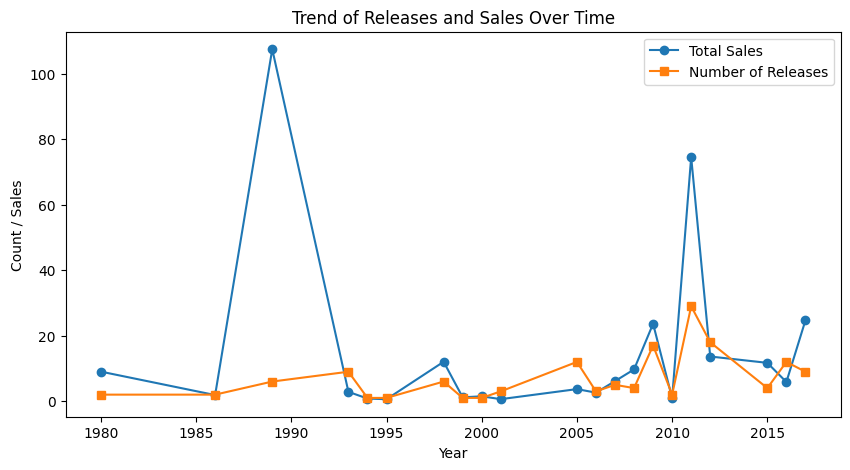

In [41]:
#4.📈 What’s the trend of releases and sales over time?
year_sales = final_Vgmerged.groupby("Year")["Global_Sales"].sum()
year_count = final_Vgmerged["Year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_sales.index, year_sales.values, marker='o', label="Total Sales")
plt.plot(year_count.index, year_count.values, marker='s', label="Number of Releases")
plt.legend()
plt.title("Trend of Releases and Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Count / Sales")
plt.show()

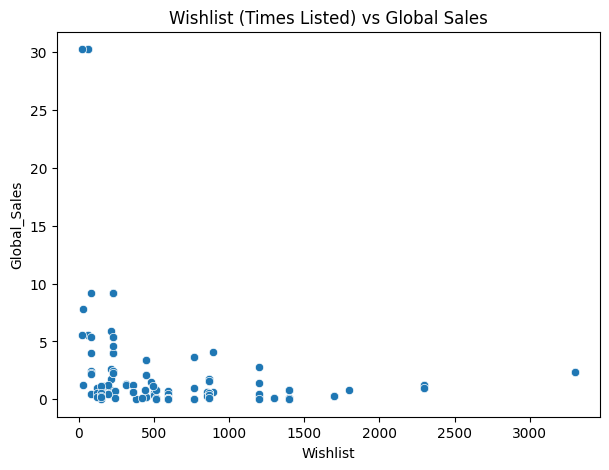

In [42]:
#5.🧍 Do highly wishlisted games lead to more sales?
plt.figure(figsize=(7,5))
sns.scatterplot(x="Wishlist", y="Global_Sales", data=final_Vgmerged)
plt.title("Wishlist (Times Listed) vs Global Sales")
plt.show()

                     Times Listed  Global_Sales
Genres                                         
Turn Based Strategy   1900.000000      0.810000
Simulator             1680.214286      3.507143
Adventure             1311.011236      1.685056
RPG                   1214.487805      1.038049
Brawler               1142.900000      1.104000
Shooter               1076.660714      0.867500
Indie                 1033.272727      0.173636
Strategy              1025.000000      0.454667
Platform              1004.133333      0.990333
Puzzle                 586.071429      8.230000
Arcade                 567.142857     11.542857
Real Time Strategy     238.000000      1.170000
Point-and-Click        222.000000      0.110000


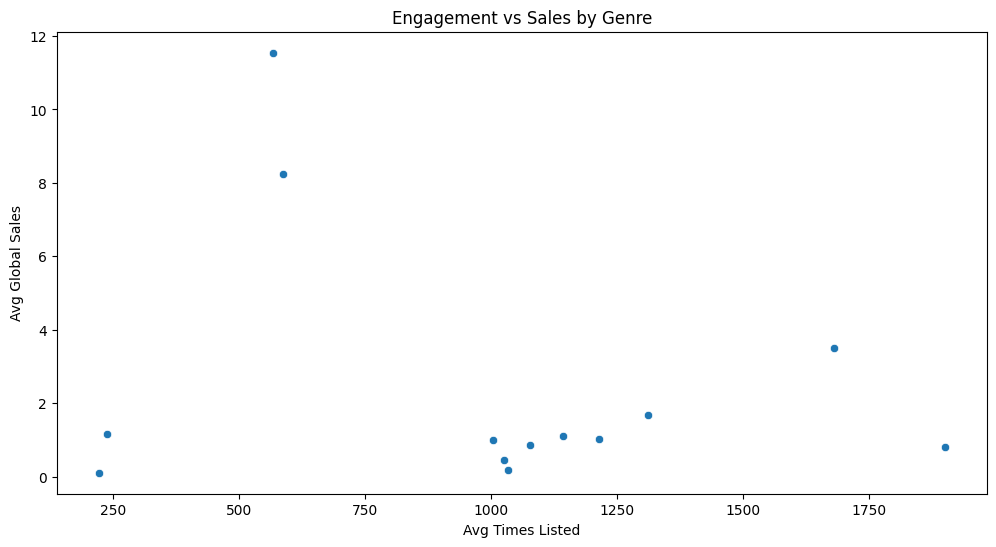

In [44]:
#6.🎮 Which genres have the highest engagement but lowest sales?
genre_exploded= final_Vgmerged.explode("Genres")
engagement_by_genre = genre_exploded.groupby("Genres")[["Times Listed", "Global_Sales"]].mean().sort_values("Times Listed", ascending=False)
print(engagement_by_genre)
plt.figure(figsize=(12,6))
sns.scatterplot(data=engagement_by_genre, x="Times Listed", y="Global_Sales")
plt.title("Engagement vs Sales by Genre")
plt.xlabel("Avg Times Listed")
plt.ylabel("Avg Global Sales")
plt.show()

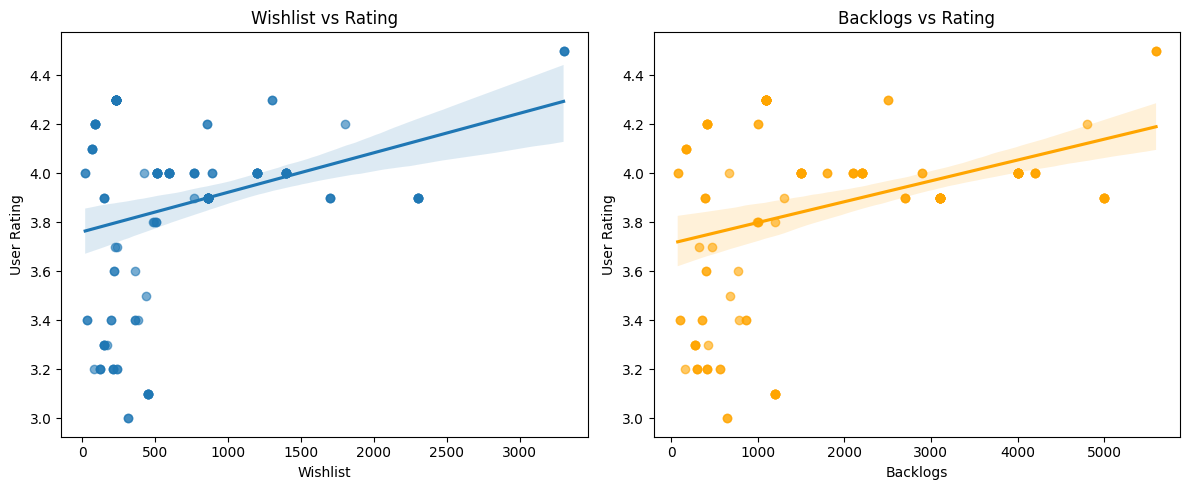

In [54]:
#7.🧠 Do highly listed games (wishlist/backlogs) correlate with better ratings?

plt.figure(figsize=(12,5))

# Times Listed vs Rating
plt.subplot(1,2,1)
sns.regplot(x="Wishlist", y="Rating", data=final_Vgmerged, scatter_kws={"alpha":0.6})
plt.title("Wishlist vs Rating")
plt.xlabel("Wishlist")
plt.ylabel("User Rating")

# Backlogs vs Rating
plt.subplot(1,2,2)
sns.regplot(x="Backlogs", y="Rating", data=final_Vgmerged, scatter_kws={"alpha":0.6}, color="orange")
plt.title("Backlogs vs Rating")
plt.xlabel("Backlogs")
plt.ylabel("User Rating")

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15712\2001338386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Genres", y="Times Listed", data=engagement_by_genre, palette="viridis")


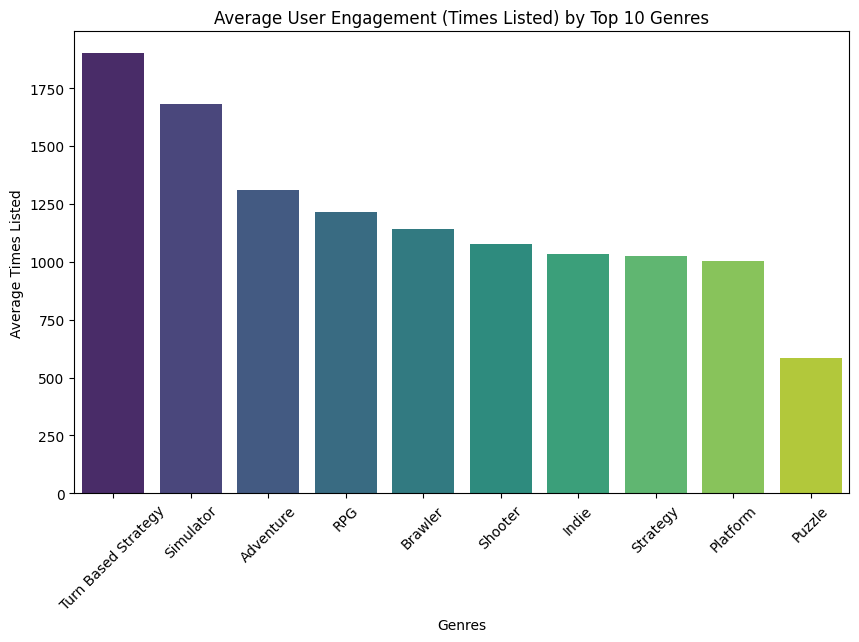

In [66]:
#8. How does user engagement differ across genres?
genre_exploded= final_Vgmerged.explode("Genres")
engagement_by_genre = (
    genre_exploded.groupby("Genres")["Times Listed"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x="Genres", y="Times Listed", data=engagement_by_genre, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average User Engagement (Times Listed) by Top 10 Genres")
plt.ylabel("Average Times Listed")
plt.show()


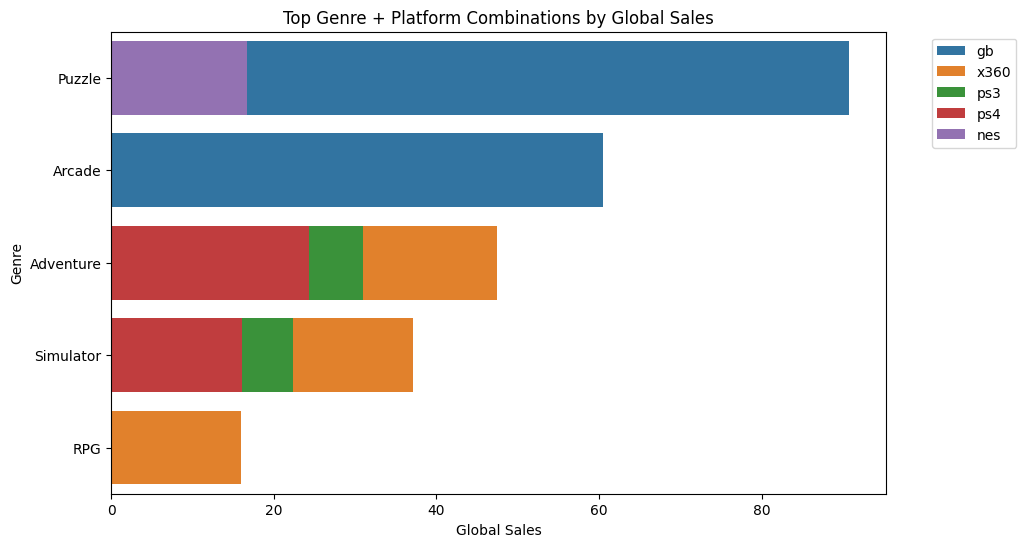

In [ ]:
#9.🎉 What are the top-performing combinations of Genre + Platform?
genre_exploded= final_Vgmerged.explode("Genres")
genre_platform_sales = genre_exploded.groupby(["Genres", "Platform"])["Global_Sales"].sum().reset_index().sort_values("Global_Sales", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=genre_platform_sales, x="Global_Sales", y="Genres", hue="Platform", dodge=False)
plt.title("Top Genre + Platform Combinations by Global Sales")
plt.xlabel("Global Sales")
plt.ylabel("Genre")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

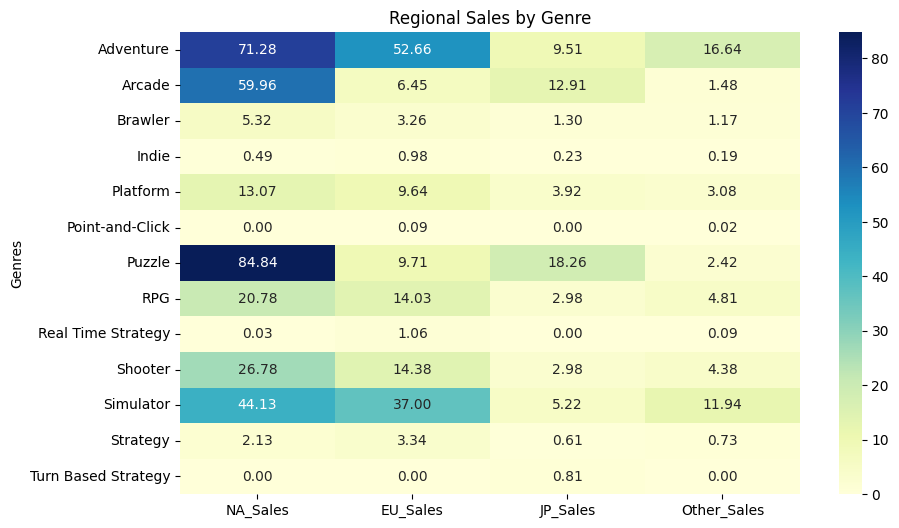

In [73]:
#10.🌐 What does a regional sales heatmap by genre reveal?
genre_exploded= final_Vgmerged.explode("Genres")
region_sales = genre_exploded.groupby("Genres")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().head(15)
plt.figure(figsize=(10,6))
sns.heatmap(region_sales, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Regional Sales by Genre")
plt.show()